# Cars Price Analysis

In [7]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('USA_cars_datasets.csv')

In [6]:
df.head()

Unnamed: 0  price      brand    model  year   title_status   mileage  \
0           0   6300     toyota  cruiser  2008  clean vehicle  274117.0   
1           1   2899       ford       se  2011  clean vehicle  190552.0   
2           2   5350      dodge      mpv  2018  clean vehicle   39590.0   
3           3  25000       ford     door  2014  clean vehicle   64146.0   
4           4  27700  chevrolet     1500  2018  clean vehicle    6654.0   

    color                  vin        lot       state country      condition  
0   black    jtezu11f88k007763  159348797  new jersey     usa   10 days left  
1  silver    2fmdk3gc4bbb02217  166951262   tennessee     usa    6 days left  
2  silver    3c4pdcgg5jt346413  167655728     georgia     usa    2 days left  
3    blue    1ftfw1et4efc23745  167753855    virginia     usa  22 hours left  
4     red    3gcpcrec2jg473991  167763266     florida     usa  22 hours left

In [8]:
df.drop(columns=['vin', 'lot', 'country','Unnamed: 0'], inplace=True)
df.head()

price      brand    model  year   title_status   mileage   color  \
0   6300     toyota  cruiser  2008  clean vehicle  274117.0   black   
1   2899       ford       se  2011  clean vehicle  190552.0  silver   
2   5350      dodge      mpv  2018  clean vehicle   39590.0  silver   
3  25000       ford     door  2014  clean vehicle   64146.0    blue   
4  27700  chevrolet     1500  2018  clean vehicle    6654.0     red   

        state      condition  
0  new jersey   10 days left  
1   tennessee    6 days left  
2     georgia    2 days left  
3    virginia  22 hours left  
4     florida  22 hours left

In [11]:
bcs = df[['brand','color','state']]

for feature in bcs:
    print(bcs[feature].value_counts())

ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
kia                  13
buick                13
honda                12
infiniti             12
mercedes-benz        10
cadillac             10
heartland             5
peterbilt             4
audi                  4
land                  4
acura                 3
mazda                 2
lexus                 2
lincoln               2
ram                   1
toyota                1
harley-davidson       1
maserati              1
jaguar                1
Name: brand, dtype: int64
white                                      707
black                                      516
gray                                       395
silver                                     300
red                                        192
blue                                       151
no_color            

In [12]:
color = df.color.value_counts().head(12).index
state = df.state.value_counts().head(32).index 
brand = df.brand.value_counts().head(15).index

bcs = color.append([brand,state])
bcs

Index(['white', 'black', 'gray', 'silver', 'red', 'blue', 'no_color', 'green',
       'orange', 'gold', 'charcoal', 'brown', 'ford', 'dodge', 'nissan',
       'chevrolet', 'gmc', 'jeep', 'chrysler', 'bmw', 'hyundai', 'kia',
       'buick', 'honda', 'infiniti', 'mercedes-benz', 'cadillac',
       'pennsylvania', 'florida', 'texas', 'california', 'michigan',
       'north carolina', 'minnesota', 'illinois', 'wisconsin', 'virginia',
       'new jersey', 'nevada', 'oklahoma', 'south carolina', 'new york',
       'georgia', 'missouri', 'arizona', 'ohio', 'massachusetts', 'oregon',
       'tennessee', 'connecticut', 'mississippi', 'west virginia', 'colorado',
       'alabama', 'indiana', 'washington', 'arkansas', 'louisiana', 'utah'],
      dtype='object')

In [13]:
def modif(x):
    if x in bcs:
        return x
    else:
        return "other"
    
df.color = df.color.apply(modif)
df.state = df.state.apply(modif)
df.brand = df.brand.apply(modif)

## 2. Times Extraction

In [14]:
df['value']= df['condition'] .str.split(' ').str[0]
df['times']= df['condition'] .str.split(' ').str[1]
df.head(3)

price  brand    model  year   title_status   mileage   color       state  \
0   6300  other  cruiser  2008  clean vehicle  274117.0   black  new jersey   
1   2899   ford       se  2011  clean vehicle  190552.0  silver   tennessee   
2   5350  dodge      mpv  2018  clean vehicle   39590.0  silver     georgia   

      condition value times  
0  10 days left    10  days  
1   6 days left     6  days  
2   2 days left     2  days

In [15]:
def days_to_min(time):
    return int(time)*1440

def hours_to_min(time):
    return int(time)*60

In [16]:
extracted_times =pd.concat([df[df['times']=='days']['value'].apply(days_to_min),
           df[df['times']=='hours']['value'].apply(hours_to_min),
           df[df['times']=='minutes']['value'].astype(int)]).rename('minutes_left',inplace=True)

In [17]:
extracted_times

0       14400
1        8640
2        2880
5        2880
9        2880
        ...  
1606       48
1609       48
2124       47
2126       47
2157       36
Name: minutes_left, Length: 2479, dtype: int64

In [18]:
df=pd.concat([df,extracted_times],axis=1)
df['minutes_left'].fillna(-200,inplace=True)
df.drop(['condition','value','times'],axis=1,inplace=True)
df.head()

price      brand    model  year   title_status   mileage   color  \
0   6300      other  cruiser  2008  clean vehicle  274117.0   black   
1   2899       ford       se  2011  clean vehicle  190552.0  silver   
2   5350      dodge      mpv  2018  clean vehicle   39590.0  silver   
3  25000       ford     door  2014  clean vehicle   64146.0    blue   
4  27700  chevrolet     1500  2018  clean vehicle    6654.0     red   

        state  minutes_left  
0  new jersey       14400.0  
1   tennessee        8640.0  
2     georgia        2880.0  
3    virginia        1320.0  
4     florida        1320.0

## 3. Year Extraction

In [19]:
def modif_year(x):
    return 2021 - x

In [20]:
df['year'] = modif_year(df.year)

In [21]:
df.head()

price      brand    model  year   title_status   mileage   color  \
0   6300      other  cruiser    13  clean vehicle  274117.0   black   
1   2899       ford       se    10  clean vehicle  190552.0  silver   
2   5350      dodge      mpv     3  clean vehicle   39590.0  silver   
3  25000       ford     door     7  clean vehicle   64146.0    blue   
4  27700  chevrolet     1500     3  clean vehicle    6654.0     red   

        state  minutes_left  
0  new jersey       14400.0  
1   tennessee        8640.0  
2     georgia        2880.0  
3    virginia        1320.0  
4     florida        1320.0

## 4. Mileage Extraction

In [22]:
df['miles/year']= df['mileage']/df['year']
df.head()

price      brand    model  year   title_status   mileage   color  \
0   6300      other  cruiser    13  clean vehicle  274117.0   black   
1   2899       ford       se    10  clean vehicle  190552.0  silver   
2   5350      dodge      mpv     3  clean vehicle   39590.0  silver   
3  25000       ford     door     7  clean vehicle   64146.0    blue   
4  27700  chevrolet     1500     3  clean vehicle    6654.0     red   

        state  minutes_left    miles/year  
0  new jersey       14400.0  21085.923077  
1   tennessee        8640.0  19055.200000  
2     georgia        2880.0  13196.666667  
3    virginia        1320.0   9163.714286  
4     florida        1320.0   2218.000000

## 5. Splitting Numerical dan Categorical data

In [25]:
categorical = df[['brand', 'model', 'title_status', 'color', 'state']]
categorical.head()

brand    model   title_status   color       state
0      other  cruiser  clean vehicle   black  new jersey
1       ford       se  clean vehicle  silver   tennessee
2      dodge      mpv  clean vehicle  silver     georgia
3       ford     door  clean vehicle    blue    virginia
4  chevrolet     1500  clean vehicle     red     florida

In [27]:
numerical = df[['year', 'mileage', 'minutes_left', 'miles/year']]
numerical.head()

year   mileage  minutes_left    miles/year
0    13  274117.0       14400.0  21085.923077
1    10  190552.0        8640.0  19055.200000
2     3   39590.0        2880.0  13196.666667
3     7   64146.0        1320.0   9163.714286
4     3    6654.0        1320.0   2218.000000

## EDA

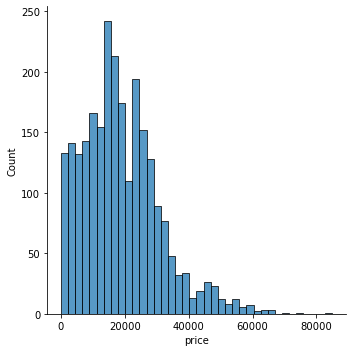

In [30]:
sns.displot(df.price)

In [32]:
df.price.max()
df[df['price'] == 84900]

price          brand     model  year   title_status  mileage   color  \
502  84900  mercedes-benz  sl-class     4  clean vehicle  25302.0  silver   

       state  minutes_left  miles/year  
502  florida        2880.0      6325.5

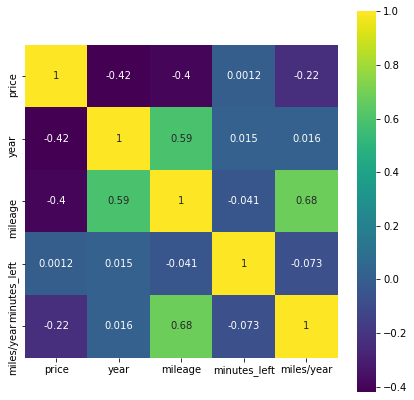

In [35]:
corrmat = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat , square=True, cmap='viridis', annot=True);

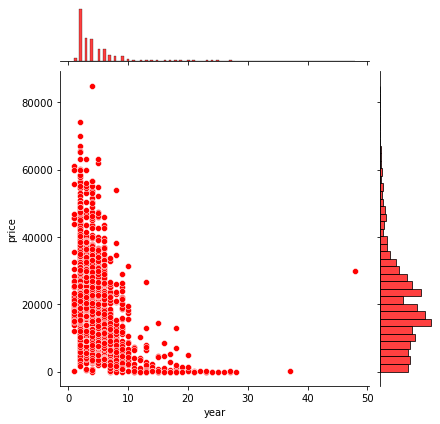

In [40]:
sns.jointplot(x=df.year, y=df.price,color='red')

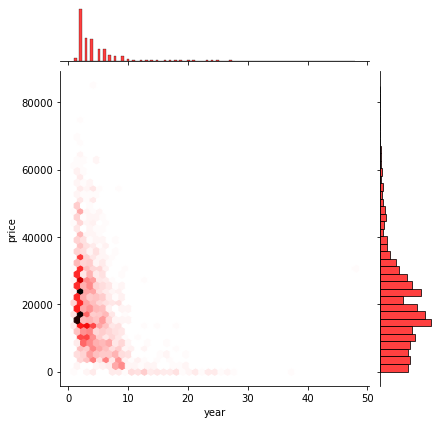

In [42]:
sns.jointplot(x=df.year, y=df.price, kind='hex', color='red')

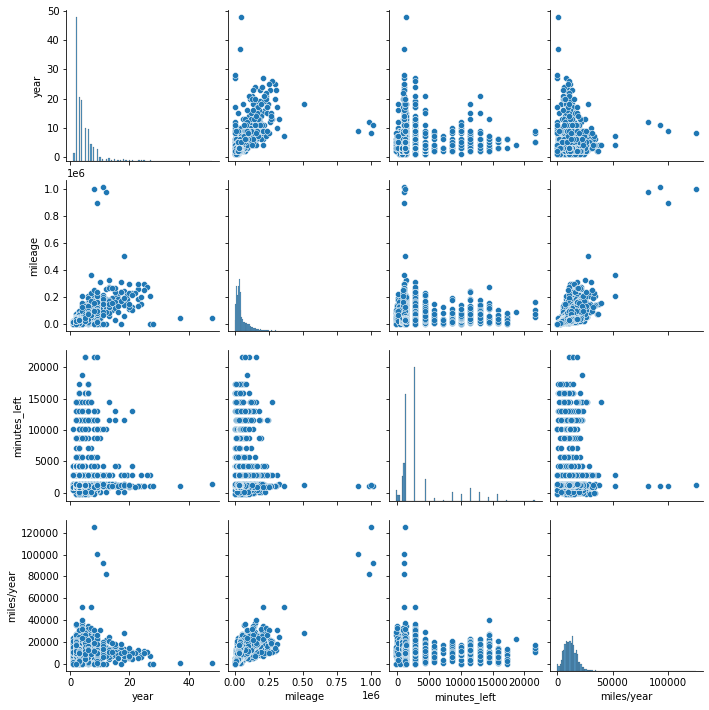

In [45]:
sns.pairplot(numerical)